In [28]:
from vizdoom import *
import random
import time
import numpy as np
from matplotlib import pyplot as plt
import os
from gym import Env
from gym.spaces import Discrete, Box
import cv2
import torch
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common import env_checker
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [4]:
game = DoomGame()
game.load_config('github/ViZDoom/scenarios/basic.cfg')
game.init()

In [9]:
actions = np.identity(3, dtype=np.uint8)
actions

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [20]:
random.choice(actions)

array([1, 0, 0], dtype=uint8)

In [6]:
game.new_episode()

In [7]:
game.is_episode_finished()

False

In [93]:
game.make_action(random.choice(actions))

-1.0

In [96]:
game.make_action??
# second param is frame skip

Docstring:
make_action(*args, **kwargs)
Overloaded function.

1. make_action(self: vizdoom.vizdoom.DoomGame, arg0: object) -> float

2. make_action(self: vizdoom.vizdoom.DoomGame, arg0: object, arg1: int) -> float
Type:      method


In [94]:
episodes = 10
for episode in range(episodes):
    # Create new episode or game
    game.new_episode()
    # Checking game is not finished
    while not game.is_episode_finished():
        state = game.get_state()
        img = state.screen_buffer # Current state game image
        info = state.game_variables
        reward = game.make_action(random.choice(actions))
        print('reward: ', reward)
        time.sleep(0.02)
    print('Result: ', game.get_total_reward())
    time.sleep(2)

reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -6.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -6.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -6.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -6.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward:  -1.0
reward

In [95]:
game.close()

# 1. Converting VizDoom to Gym Environment

In [132]:
Box(low=0, high=255, shape=(320, 240), dtype=np.uint8).sample()

array([[146, 156,  74, ..., 181,  87, 204],
       [149, 179,  16, ...,  93, 116,  41],
       [218,  38,  34, ...,  31, 255,  72],
       ...,
       [154,  44,  18, ...,  21,  10, 200],
       [165, 169, 100, ...,  36, 211, 122],
       [105,  82,  18, ...,  31,  82,  28]], dtype=uint8)

In [133]:
Discrete(3).sample()

1

In [118]:
actions[Discrete(3).sample()]

array([0, 0, 1], dtype=uint8)

In [16]:
# Create VizDoom OpenAi Gym Environment
class VizDoomGym(Env):
    def __init__(self, render=False):
        super().__init__()
        self.game = DoomGame()
        self.game.load_config('github/ViZDoom/scenarios/basic.cfg')
        self.observation_space = Box(low=0, high=255, shape=(100, 160, 1), dtype=np.uint8)
        self.action_space = Discrete(3)
        if render:
            self.game.set_window_visible(True)
        else:
            self.game.set_window_visible(False)
        self.game.init()

    def step(self, action):
        actions = np.identity(3, dtype=np.uint8)
        reward = self.game.make_action(actions[action], 4)
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
        else:
            state = np.zeros(self.observation_space.shape)
            ammo = 0
        
        info = {"ammo": ammo}
        
        done = self.game.is_episode_finished()

        return state, reward, done, info

    def render():
        pass
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)

    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state

    def close(self):
        self.game.close()

In [219]:
env =  VizDoomGym(True)

In [220]:
state = env.reset()

In [186]:
env.step(0)

(array([[[67, 67, 67, ..., 67, 67, 67],
         [91, 91, 79, ..., 91, 79, 79],
         [67, 67, 67, ..., 67, 67, 67],
         ...,
         [19, 19, 11, ..., 47, 47, 55],
         [19, 27, 19, ..., 47, 47, 47],
         [11, 19, 19, ..., 27, 19, 19]],
 
        [[67, 67, 67, ..., 67, 67, 67],
         [91, 91, 79, ..., 91, 79, 79],
         [67, 67, 67, ..., 67, 67, 67],
         ...,
         [19, 19, 11, ..., 47, 47, 55],
         [19, 27, 19, ..., 47, 47, 47],
         [11, 19, 19, ..., 27, 19, 19]],
 
        [[67, 67, 67, ..., 67, 67, 67],
         [91, 91, 79, ..., 91, 79, 79],
         [67, 67, 67, ..., 67, 67, 67],
         ...,
         [19, 19, 11, ..., 47, 47, 55],
         [19, 27, 19, ..., 47, 47, 47],
         [11, 19, 19, ..., 27, 19, 19]]], dtype=uint8),
 -4.0,
 False,
 array([50.]))

In [187]:
env.observation_space.sample().shape

(3, 240, 320)

In [18]:
env.close()

In [214]:
state

array([[35, 39, 39, ..., 39, 39, 39],
       [59, 67, 59, ..., 67, 67, 91],
       [79, 79, 79, ..., 79, 91, 91],
       ...,
       [19, 19, 11, ..., 47, 47, 55],
       [19, 27, 19, ..., 47, 47, 47],
       [11, 19, 19, ..., 27, 19, 19]], dtype=uint8)

In [17]:
env = VizDoomGym(True)
env_checker.check_env(env)

# 2. View Game State

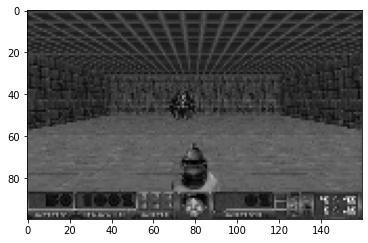

In [227]:
plt.imshow(state, cmap='gray')

# 3. Setup Callback

In [5]:
class TrainLogCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainLogCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [7]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

In [8]:
callback = TrainLogCallback(10000, CHECKPOINT_DIR)

# 4. Train Model

In [25]:
env = VizDoomGym()
model = PPO(
    'CnnPolicy', 
    env, 
    tensorboard_log=LOG_DIR, 
    verbose=1, 
    learning_rate=0.0001,
    n_steps=2048
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [26]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/log_basic\PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | -66.2    |
| time/              |          |
|    fps             | 30       |
|    iterations      | 1        |
|    time_elapsed    | 66       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 32.5        |
|    ep_rew_mean          | -83.1       |
| time/                   |             |
|    fps                  | 17          |
|    iterations           | 2           |
|    time_elapsed         | 227         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007911428 |
|    clip_fraction        | 0.0986      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.000358  

# 5. Test Model

In [30]:
## Continued at 1:46:05 while training
model = PPO.load('./train/train_basic/best_model_110000') ## Pass in model dir

In [39]:
env = VizDoomGym(render = True)

In [35]:
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10)

In [37]:
mean_reward

85.8

In [43]:
for episode in range(5):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        time.sleep(0.25)
        total_reward += reward
    print('Total reward for episode {} is {}'.format(total_reward, episode))
    time.sleep(2)

Total reward for episode 95.0 is 0
Total reward for episode 67.0 is 1
Total reward for episode 83.0 is 2
Total reward for episode 79.0 is 3
Total reward for episode 95.0 is 4


In [44]:
env.close()